In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import cv2

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%matplotlib inline

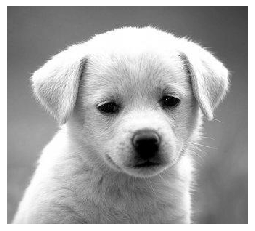

In [2]:
# Open image as grayscale
img = cv2.imread('img/dog.jpg', 0)

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

In [45]:
def conv_fast(image, kernel):
    """ An efficient implementation of convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute weighted sum of neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - There should be two nested for-loops
        - You may find np.flip() and np.sum() useful

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape

    
    out = np.zeros(image.shape)

    im = zero_pad(image, Hk // 2, Wk//2)

    for i in range(Hi):
        for j in range(Wi):
            out[i, j] = np.sum(im[i:i+Hk,j:j+Wk] * np.flip(kernel))
    
    return out

In [3]:
def zero_pad(image, pad_height, pad_width):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_height = 1, pad_width = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W).
        pad_width: width of the zero padding (left and right padding).
        pad_height: height of the zero padding (bottom and top padding).

    Returns:
        out: numpy array of shape (H+2*pad_height, W+2*pad_width).
    """

    out = image.copy()
    
    z = np.zeros([pad_height, out.shape[1]])
    out = np.r_[z.copy(), out, z.copy()]

    z = np.zeros([out.shape[0], pad_width])
    out = np.c_[z.copy(), out, z.copy()]
    return out


In [15]:
def zero_pad_plus(image, pad_height_u, pad_height_d, pad_width_l, pad_width_r):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_height = 1, pad_width = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W).
        pad_width: width of the zero padding (left and right padding).
        pad_height: height of the zero padding (bottom and top padding).

    Returns:
        out: numpy array of shape (H+2*pad_height, W+2*pad_width).
    """

    out = image.copy()
    
    z1 = np.zeros([pad_height_u, out.shape[1]])
    z2 = np.zeros([pad_height_d, out.shape[1]])
    out = np.r_[z1, out,z2]

    z1 = np.zeros([out.shape[0], pad_width_l])
    z2 = np.zeros([out.shape[0], pad_width_r])
    out = np.c_[z1, out,z2]
    return out

In [85]:
def conv_faster(image, kernel):
    Hi, Wi = image.shape
    print(image.shape)
    Hk, Wk = kernel.shape
    
    im = zero_pad(image, Hk // 2, Wk//2)
    
    Hi, Wi = im.shape
    kern = np.r_[kernel, np.zeros([Hi-Hk, Wk])]
    kern = np.c_[kern, np.zeros([kern.shape[0] ,Wi-Wk])]
    
#     Hi, Wi = im.shape
#     kern = np.r_[np.zeros([Hi-Hk, Wk]), kernel]
#     kern = np.c_[np.zeros([kern.shape[0] ,Wi-Wk]), kern]
#     Hi, Wi = im.shape
#     kern = zero_pad_plus(kernel, (Hi-Hk) // 2, (Hi-Hk) // 2, (Wi-Wk)//2, (Wi-Wk)//2)
#     print(kern)
#     out = np.zeros(image.shape)
#     print(kern)

    fim = np.fft.fft2(im)  
    fim = np.fft.fftshift(fim) 
    fkern = np.fft.fft2(kern)  
    fkern = np.fft.fftshift(fkern)  
    
    fout = fim*fkern
     
    out = np.fft.ifftshift(fout)  
    out = np.fft.ifft2(out)
#     out = np.fft.ifft2(fout)
    out = np.real(out)
    
#     out = np.delete(out, range(Hk // 2), 0) 
#     out = np.delete(out, range(-Hk // 2, -1,1), 0)
    
#     out = np.delete(out, range(Wk // 2), 1)
#     out = np.delete(out, range(-Wk // 2, -1, 1), 1)
#     out = np.delete(out, range(-Wk, -1, 1), 1)
#     out = np.delete(out, range(-Hk, -1,1), 0)
    out = np.delete(out, range(Wk-1), 1)
    out = np.delete(out, range(Hk-1), 0)
    print(out.shape)
    return out.astype(np.int64)

(9, 9)
(9, 9)


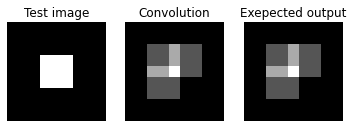

In [86]:
# Simple convolution kernel.
kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,0]
])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1

# Run your conv_nested function on the test image
test_output = conv_faster(test_img, kernel)

# Build the expected output
expected_output = np.zeros((9, 9))
expected_output[2:7, 2:7] = 1
expected_output[5:, 5:] = 0
expected_output[4, 2:5] = 2
expected_output[2:5, 4] = 2
expected_output[4, 4] = 3

# Plot the test image
plt.subplot(1,3,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

# Plot your convolved image
plt.subplot(1,3,2)
plt.imshow(test_output)
plt.title('Convolution')
plt.axis('off')

# Plot the exepected output
plt.subplot(1,3,3)
plt.imshow(expected_output)
plt.title('Exepected output')
plt.axis('off')
plt.show()

(300, 332)
(300, 332)
conv_faster: took 0.058023 seconds.
conv_fast: took 0.968839 seconds.


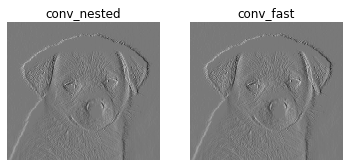

In [87]:
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_faster = conv_faster(img, kernel)
t2 = time()


# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_faster)
plt.title('conv_nested')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

# Compare the running time of the two implementations
print("conv_faster: took %f seconds." % (t2 - t1))
print("conv_fast: took %f seconds." % (t1 - t0))

In [88]:
out_fast, out_faster

(array([[ 265.,   -3.,   -1., ...,    0.,   -3., -183.],
        [ 355.,   -4.,   -2., ...,    0.,   -3., -244.],
        [ 357.,   -3.,   -1., ...,   -1.,   -2., -244.],
        ...,
        [ 576.,    4.,   18., ...,    0.,   -4., -412.],
        [ 577.,   12.,   32., ...,    0.,   -4., -412.],
        [ 434.,   13.,   29., ...,    0.,   -3., -309.]]),
 array([[ 264,   -3,   -1, ...,    0,   -3, -182],
        [ 354,   -4,   -2, ...,    0,   -3, -244],
        [ 356,   -3,   -1, ...,   -1,   -2, -243],
        ...,
        [ 575,    3,   17, ...,    0,   -4, -412],
        [ 576,   11,   31, ...,    0,   -3, -411],
        [ 433,   12,   28, ...,    0,   -3, -309]], dtype=int64))